# Validation using Availability-Fidelity plots

In [1]:
import numpy as np
import math
import importlib as imp
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm as tqdmn

import main_1GnB as main

---
---
## 1G2B - identity and DEJMPS

In [6]:
n = 2

# GEN
p_gen = 0.5
F_new = 0.9
rho_new = np.diag([F_new, (1-F_new)/3, (1-F_new)/3, (1-F_new)/3])

# PURIF
q_purif_vec = np.linspace(0,1,5)
purif_policies = [main.policy_identity, main.policy_replacement, main.policy_DEJMPS]
policy_names = ['Identity', 'Replacement', 'DEJMPS']
pur_after_swap = False

# NOISE
Gamma = 1/50 #1/5

# CONS
p_cons = 0.3

# Numerical
t_end = int(1e5)
randomseed = 2

In [7]:
## SIMULATION ##

imp.reload(main)

Fcons_avg_vec = [[] for policy in purif_policies]
Fcons_stderr_vec = [[] for policy in purif_policies]
A_avg_vec = [[] for policy in purif_policies]
A_stderr_vec = [[] for policy in purif_policies]

for idx_policy, purif_policy in enumerate(purif_policies):
    for q_purif in tqdmn(q_purif_vec):
        F_avg,F_err,A_avg,A_err,_, _, _ = main.single_run_1GnB(n, p_gen, rho_new, q_purif, 
                                                               purif_policy, pur_after_swap, Gamma,
                                                               p_cons, t_end, randomseed)
        Fcons_avg_vec[idx_policy] += [F_avg]
        Fcons_stderr_vec[idx_policy] += [F_err]
        A_avg_vec[idx_policy] += [A_avg]
        A_stderr_vec[idx_policy] += [A_err]
        
sim_data = {'Fcons_avg_vec': Fcons_avg_vec,
            'Fcons_stderr_vec': Fcons_stderr_vec,
            'A_avg_vec': A_avg_vec,
            'A_stderr_vec': A_stderr_vec}

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

In [8]:
## THEORY ##

imp.reload(main)

Fcons_theory_vec = [[] for policy in purif_policies]
A_theory_vec = [[] for policy in purif_policies]

for idx_policy, purif_policy in enumerate(purif_policies):
    for q_purif in q_purif_vec:
        A, Fcons = main.analytical_availability_Fcons(n, p_gen, rho_new, q_purif,
                                                      purif_policy, pur_after_swap, Gamma, p_cons)
        Fcons_theory_vec[idx_policy] += [Fcons]
        A_theory_vec[idx_policy] += [A]

theory_data = {'Fcons_avg': Fcons_theory_vec,
                'A': A_theory_vec}

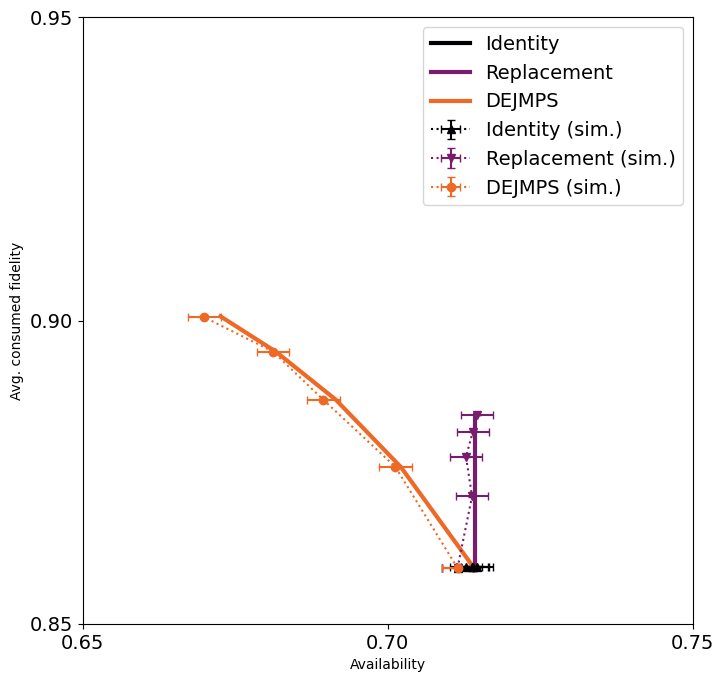

In [9]:
## PLOT ##

imp.reload(main)

main.AFplot(policy_names, sim_data=sim_data, theory_data=theory_data, filename=None)

---
---
## 1G$n$B - identity, DEJMPS, concatenated DEJMPS

In [22]:
n = 6

# GEN
p_gen = 0.5
F_new = 0.9
rho_new = np.diag([F_new, (1-F_new)/3, (1-F_new)/3, (1-F_new)/3])

# PURIF
q_purif_vec = np.linspace(0,1,10)
purif_policies = [main.policy_DEJMPS, main.policy_doubleDEJMPS,
                    main.policy_nestedDEJMPS, main.policy_opt_bilocal_Clifford]
policy_names = ['DEJMPS', 'Double DEJMPS', 'Nested DEJMPS', 'Opt. bi. Cliff.']
pur_after_swap = False

# NOISE
Gamma = 1/50 #1/5

# CONS
p_cons = 0.3

# Numerical
t_end = int(1e5)
randomseed = 2

In [23]:
## SIMULATION ##

imp.reload(main)

Fcons_avg_vec = [[] for policy in purif_policies]
Fcons_stderr_vec = [[] for policy in purif_policies]
A_avg_vec = [[] for policy in purif_policies]
A_stderr_vec = [[] for policy in purif_policies]

for idx_policy, purif_policy in enumerate(purif_policies):
    for q_purif in tqdmn(q_purif_vec):
        F_avg,F_err,A_avg,A_err,_, _, _ = main.single_run_1GnB(n, p_gen, rho_new, q_purif, 
                                                               purif_policy, pur_after_swap, Gamma,
                                                               p_cons, t_end, randomseed)
        Fcons_avg_vec[idx_policy] += [F_avg]
        Fcons_stderr_vec[idx_policy] += [F_err]
        A_avg_vec[idx_policy] += [A_avg]
        A_stderr_vec[idx_policy] += [A_err]
        
sim_data = {'Fcons_avg_vec': Fcons_avg_vec,
            'Fcons_stderr_vec': Fcons_stderr_vec,
            'A_avg_vec': A_avg_vec,
            'A_stderr_vec': A_stderr_vec}

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

In [24]:
## THEORY ##

imp.reload(main)

Fcons_theory_vec = [[] for policy in purif_policies]
A_theory_vec = [[] for policy in purif_policies]

for idx_policy, purif_policy in enumerate(purif_policies):
    for q_purif in q_purif_vec:
        A, Fcons = main.analytical_availability_Fcons(n, p_gen, rho_new, q_purif,
                                                      purif_policy, pur_after_swap, Gamma, p_cons)
        Fcons_theory_vec[idx_policy] += [Fcons]
        A_theory_vec[idx_policy] += [A]

theory_data = {'Fcons_avg': Fcons_theory_vec,
                'A': A_theory_vec}

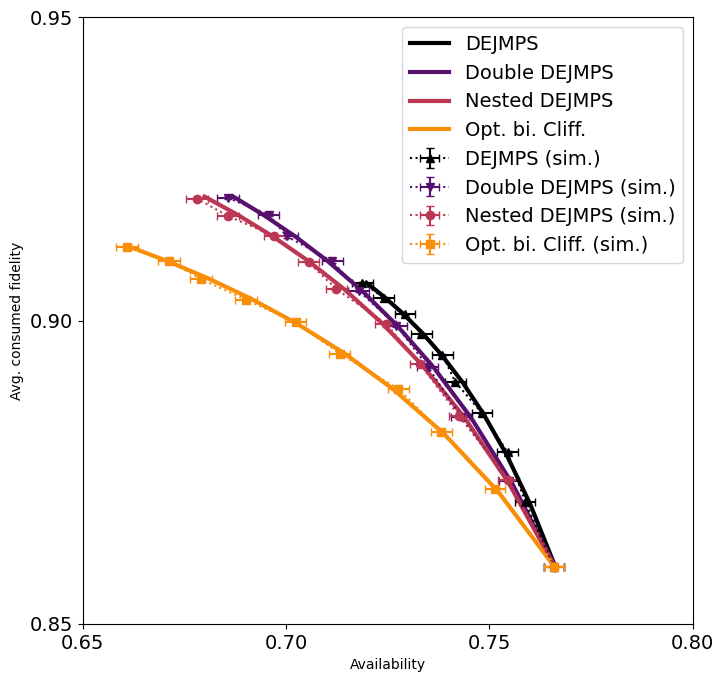

In [25]:
## PLOT ##

imp.reload(main)

main.AFplot(policy_names, sim_data=sim_data, theory_data=theory_data, filename=None)